# Data Analysis and Visualization
The goal of this jupyter notebook worksheet is to visualize and perform data analysis
## 1. Loading the data

In [155]:
# Load the data
# data is first downloweded into DATA_PATH from 
# http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

DATA_PATH = 'data'
FILE_NAME = 'train.csv'

# load_data: string, string --> pd.DataFrame
# load data from os.path.join(data_path, file_name) and
# return as pd.DataFrame
def load_data(data_path=DATA_PATH, file_name=FILE_NAME):
    # load everything into data
    file_path = os.path.join(data_path, file_name)
    data = pd.read_csv(file_path)
    
    return data


In [191]:
data = load_data()

In [196]:
data['OverallCond'].dtype

dtype('int64')

## 2. Seperating the Data
### 2.1 Separating according to Numerical and Categorical
- numerical: int or float
- categorical: all numerical

In [181]:
# seperate_num_and_cat: pd.DataFrame --> pd.DataFrame, pd.DataFrame
# seperates data into one pd.DataFrame of np.float64 np.array
# and one pd.DataFrame of string
def seperate_num_and_cat(data):
    
    # numerical data type
    cont_type = [int, np.int64, float, np.float64]
    
    nums = []
    cats = []
    
    for col in data.columns:
        if data[col].dtype in cont_type:
            nums.append(col)
            #data[col].to_numeric()
        else:
            cats.append(col)

    return data[nums], data[cats].astype(str)

In [187]:
nums, cats = seperate_num_and_cat(load_data())

### 2.2 Seperate according to continous, discrete, and categorical
- continous: float, things that have continuous ouputs, feet, m^2 eg
- discrete: orderable data: number of of rooms, quality rating low to high, etc
- categorical: types

In [188]:
# seperate_num_and_cat: pd.DataFrame --> pd.DataFrame, pd.DataFrame
# seperates data into one pd.DataFrame of np.float64 np.array
# and one pd.DataFrame of string
def seperate_cont_discrete_cat(data):
    
    # continuous data type
    cont_type = [int, np.int64, float, np.float64]
    
    # discrete data colomns
    discrete_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 
                'YearBuilt', 'YearRemodAdd', 
                'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                'HalfBath', 'Bedroom', 'Kitchen', 
                'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                'BedroomAbvGr', 'KitchenAbvGr', 'MoSold', 'YrSold']
    
    conts = []
    discretes = []
    cats = []
    
    for col in data.columns:
        if col in discrete_cols:
            discretes.append(col)
        elif data[col].dtype in cont_type:
            conts.append(col)
        else:
            cats.append(col)

    return data[conts], data[discretes], data[cats]#.astype(str)

In [184]:
conts, discretes, cats2 = seperate_cont_discrete_cat(load_data())

### 2.3 Seperate By Cateory
The seperation scheme is as follows
1. Seperate according to closely related categories: e.g. garage size in car, garage size in m^2, garage ...
2. Then in each category, seperate by 2.1 or 2.2

In [209]:
def seperate_by_cat(data):
    cats = []
    cats.append(['LotFrontage', 'LotArea', 'LotShape', 
            'LotConfig'])
    cats.append(['Condition1', 'Condition2'])
    cats.append(['OverallQual', 'OverallCond'])
    cats.append(['YearBuilt', 'YearRemodAdd'])
    cats.append(['RoofStyle', 'RoofMatl'])
    cats.append(['Exterior1st', 'Exterior2nd'])
    cats.append(['MasVnrType', 'MasVnrArea'])
    cats.append(['ExterQual', 'ExterCond'])
    cats.append(['BsmtQual', 'BsmtCond', 'BsmtExposure', 
                 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'])
    cats.append(['Heating', 'HeatingQC', 'CentralAir'])
    cats.append(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'])
    cats.append(['HalfBath', 'KitchenQual'])
    cats.append(['Fireplaces', 'FireplaceQu'])
    cats.append(['GarageType', 'GarageYrBlt', 'GarageFinish', 
                 'GarageCars', 'GarageArea', 'GarageQual', 
                 'GarageCond', 'PavedDrive'])
    cats.append(['PoolArea', 'PoolQC'])
    cats.append(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'])
    cats.append(['MoSold', 'YrSold'])
    
    left_over = []
    
    for col in data.columns:
        in_left_over = True
        
        for i in range(len(cats)):
            if col in cats[i]:
                in_left_over = False
                break
                
        if in_left_over:
            left_over.append(col)
    
    cats.append(left_over)
    
    ans = []
    for i in range(len(cats)):
        ans.append(data[cats[i]])
    
    return ans        
        
        

In [210]:
by_cat = seperate_by_cat(load_data())

## 3 Fill missing Data and Encoding categorical data.

In [ ]:

def encode(cats):
    encoders = {}
    encoded_cats = {}
    
    for cat in cats.columns:
        encoder = LabelEncoder()
        encoded_cats[cat] = encoder.fit_transform(cats[cat]) # won't work if cats has missing value
        encoders[cat] = encoder
    
    return pd.DataFrame(encoded_cats), encoders

def pipe_line():
    nums, cats = seperate_num_and_cat(load_data())
    
    # encode categorical data
    encoded_cats, encoders = encode(cats) 
    
    # fill missing numerical data
    nums = nums.fillna(nums.mean())
    
    # normalize (X-\mu)/\sigma
    from sklearn import preprocessing

    # standardise the means to 0 and standard error to 1
    for i in nums.columns[1:]:
        nums[i] = preprocessing.scale(nums[i].astype('float64'))
    
    return nums, encoded_cats, encoders

nums, cats, encoders = pipe_line()

## 2. Observations
- Many numerical data are filled with error: there is a large bar column of data sitting on top of x=0. If you read what the data represent, having x=0 is absurd. Probably the data is missing, eg. MasVnrArea, LowQualFinSF, 2ndFlrSF
- Many numerical data are only representative for x small (ie. has a good trend). e.g. LotArea
- Some numerical data should really be categorical: e.g. BsmtFullBath, BsmtHalfBath
- Some categorical data are very bad predictors, probably do more harm than good for our regressor: e.g. Utilities
- Seems to me gradient boost is very good here. Some numerical data has clear trend, but large variation. Gradient boost might capture those variation.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def make_plots(data, nums, encoders):
    for cat in data:
        fig, ax = plt.subplots()
        x = data[cat]
        y = nums['SalePrice']
        ax.plot(x,y, 'o', alpha=0.1)
        ax.set_title(cat)
        fig

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


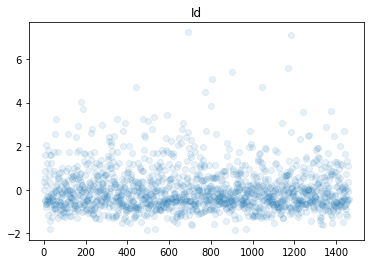

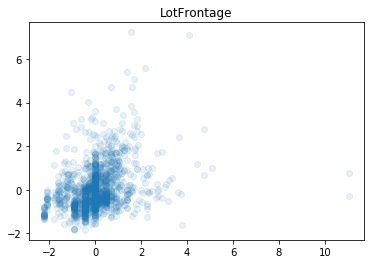

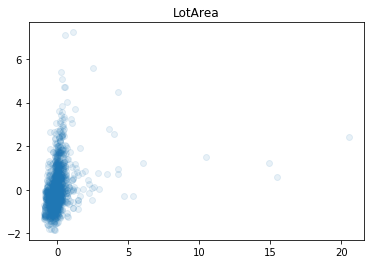

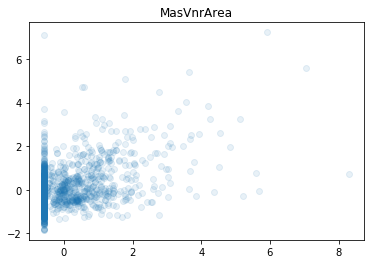

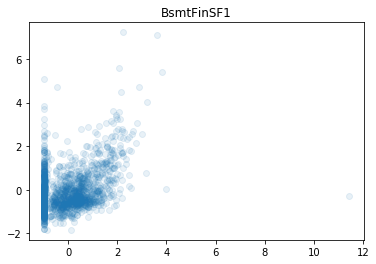

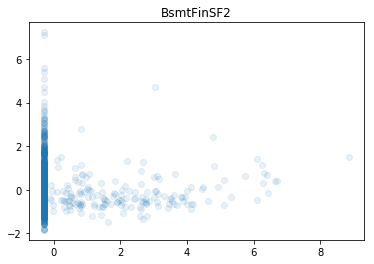

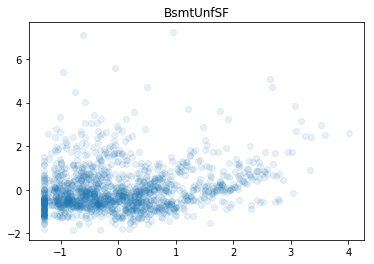

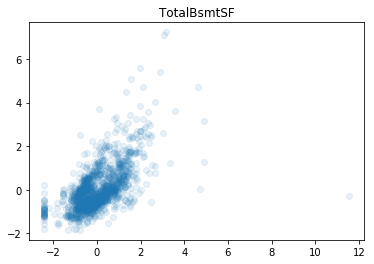

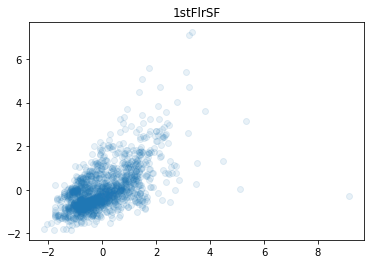

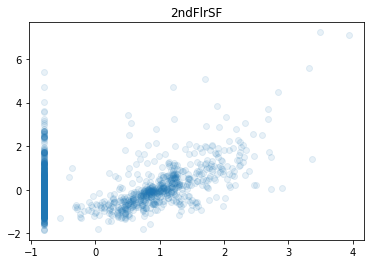

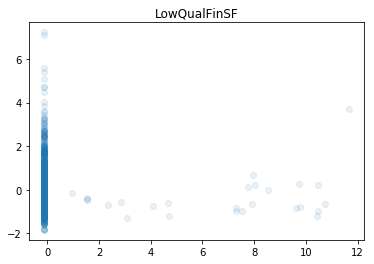

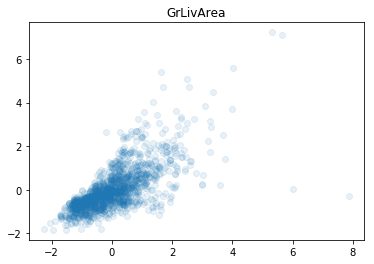

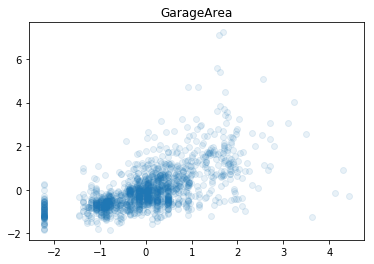

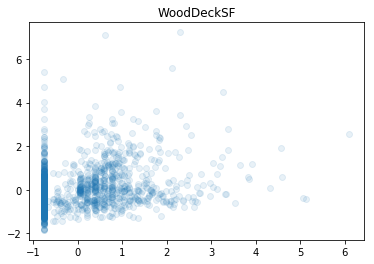

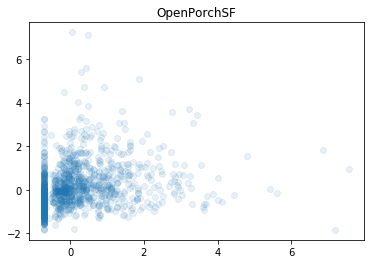

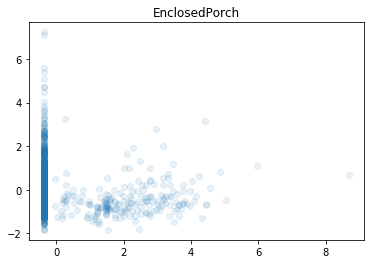

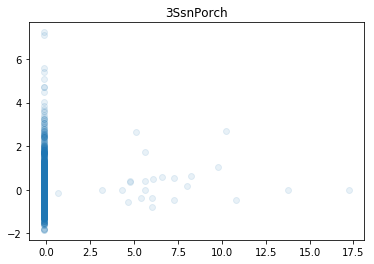

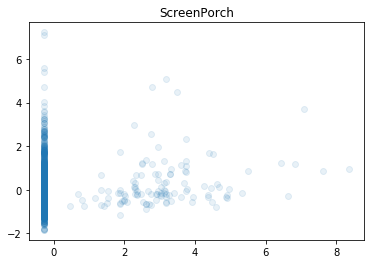

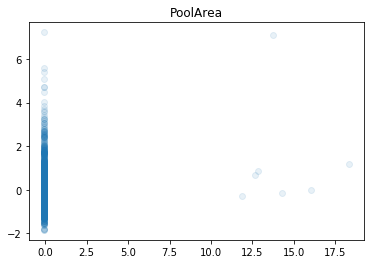

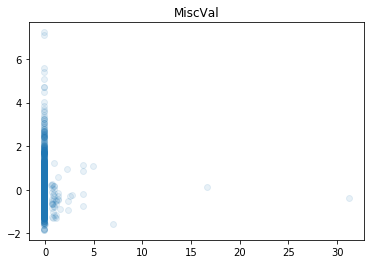

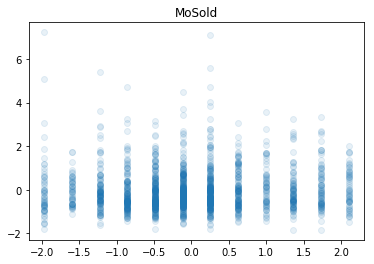

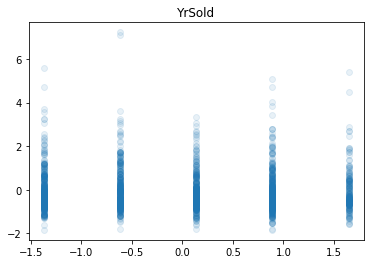

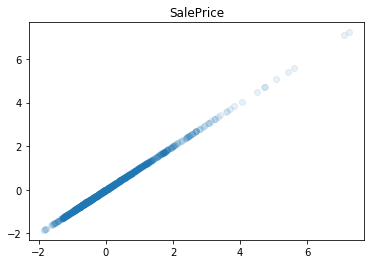

In [158]:
make_plots(nums, nums, encoders)

## 3 Covariance

In [89]:
nums.cov()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,177755.000000,198.968472,-108.390207,-1.398197e+05,-16.539068,5.915696,-1.618818e+02,-191.474297,-3.842688e+03,-9.661021e+02,...,-1.566468e+03,-1.332214e+01,74.450651,-576.428376,31.270391,966.275531,-1305.726525,24.133653,0.398561,-7.340732e+05
MSSubClass,198.968472,1789.338306,-404.439075,-5.901742e+04,1.908771,-2.792117,3.558134e+01,35.439934,1.758378e+02,-1.347356e+03,...,-6.669453e+01,-1.709661e+01,-31.119180,-54.348569,-61.394007,14.076652,-161.243759,-1.553607,-1.202630,-2.832337e+05
LotFrontage,-108.390207,-404.439075,589.749169,8.199814e+04,8.673047,-1.573935,9.510848e+01,45.744675,8.712074e+02,2.635953e+03,...,2.587889e+02,2.438681e+02,16.022614,48.936214,56.264418,194.586364,15.520479,0.735389,0.240700,7.124262e+05
LotArea,-139819.667238,-59017.418634,81998.138404,9.962565e+07,1460.548271,-62.602871,4.289113e+03,2841.343594,1.884014e+05,9.746908e+05,...,2.148006e+05,5.606253e+04,-11188.088772,5976.210971,24020.024881,31148.209380,188508.749657,32.517342,-189.050203,2.092111e+08
OverallQual,-16.539068,1.908771,8.673047,1.460548e+03,1.912679,-0.141484,2.390622e+01,15.723417,1.030121e+02,1.511770e+02,...,4.141573e+01,2.829764e+01,-9.630806,1.231398,5.003537,3.620945,-21.548945,0.264785,-0.050229,8.690413e+04
OverallCond,5.915696,-2.792117,-1.573935,-6.260287e+01,-0.141484,1.238322,-1.263671e+01,1.694152,-2.581896e+01,-2.346427e+01,...,-4.649741e-01,-2.402762e+00,4.785160,0.832039,3.400819,-0.088745,37.970669,-0.010563,0.064953,-6.882739e+03
YearBuilt,-161.881768,35.581337,95.108483,4.289113e+03,23.906215,-12.636709,9.122154e+02,369.675456,1.725993e+03,3.437028e+03,...,8.513053e+02,3.775838e+02,-714.886948,27.763434,-84.815514,6.006353,-515.209195,1.012426,-0.546237,1.254637e+06
YearRemodAdd,-191.474297,35.439934,45.744675,2.841344e+03,15.723417,1.694152,3.696755e+02,426.232822,6.716764e+02,1.209533e+03,...,5.323509e+02,3.095486e+02,-244.692937,27.410061,-44.594964,4.835329,-105.358566,1.199517,0.980046,8.317079e+05
MasVnrArea,-3842.687941,175.837842,871.207424,1.884014e+05,103.012054,-25.818956,1.725993e+03,671.676358,3.278497e+04,2.182760e+04,...,3.626330e+03,1.503301e+03,-1218.999064,100.044636,622.125969,85.516034,-2685.666442,-2.915638,-1.973363,6.854858e+06
BsmtFinSF1,-966.102125,-1347.355751,2635.952669,9.746908e+05,151.176998,-23.464270,3.437028e+03,1209.532821,2.182760e+04,2.080255e+05,...,1.167953e+04,3.377322e+03,-2851.840396,353.685020,1577.237193,2574.473738,808.155748,-19.393195,8.697797,1.400137e+07


In [104]:
a = 

,a
0,NaN
1,1.0
2,2.0


In [116]:
import pandas as pd
from sklearn import preprocessing

df = pd.DataFrame({'a' : [1,2,3], 'b' : [4,5,6]})

# standardise the means to 0 and standard error to 1
for i in df.columns[:]: # df.columns[:-1] = dataframe for all features
    df[i] = preprocessing.scale(df[i].astype('float64'))

In [117]:
df

,a,b
0,-1.224745,-1.224745
1,0.000000,0.000000
2,1.224745,1.224745
